In [1]:
#Importing the python libraries
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
tf.random.set_seed(7)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing import sequence

from sklearn.linear_model import LogisticRegression as lr
from sklearn.feature_selection import RFE

# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

#Set the max columns and rows
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

2022-08-27 16:12:23.828572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-27 16:12:23.828625: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Import the data set
#data = pd.read_csv(r'C:\Users\thesa\Desktop\data\2021-01-01.csv')
#data.head()
path = '/home/satheesh/q1'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col='date', header=0,parse_dates=True)
    print(filename)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

/home/satheesh/q1/2021-03-12.csv
/home/satheesh/q1/2021-03-02.csv
/home/satheesh/q1/2021-03-03.csv
/home/satheesh/q1/2021-01-11.csv
/home/satheesh/q1/2021-03-14.csv
/home/satheesh/q1/2021-01-16.csv
/home/satheesh/q1/2021-03-24.csv
/home/satheesh/q1/2021-01-18.csv
/home/satheesh/q1/2021-03-25.csv
/home/satheesh/q1/2021-03-19.csv
/home/satheesh/q1/2021-02-24.csv
/home/satheesh/q1/2021-01-09.csv
/home/satheesh/q1/2021-03-21.csv
/home/satheesh/q1/2021-02-18.csv
/home/satheesh/q1/2021-02-17.csv
/home/satheesh/q1/2021-03-09.csv
/home/satheesh/q1/2021-02-13.csv
/home/satheesh/q1/2021-01-10.csv
/home/satheesh/q1/2021-01-23.csv
/home/satheesh/q1/2021-03-13.csv
/home/satheesh/q1/2021-03-22.csv
/home/satheesh/q1/2021-01-31.csv
/home/satheesh/q1/2021-02-27.csv
/home/satheesh/q1/2021-03-26.csv
/home/satheesh/q1/2021-01-21.csv
/home/satheesh/q1/2021-01-07.csv
/home/satheesh/q1/2021-03-16.csv
/home/satheesh/q1/2021-02-07.csv
/home/satheesh/q1/2021-03-28.csv
/home/satheesh/q1/2021-03-27.csv
/home/sath

In [3]:
#Check the structure of dataset
print("Shape of the dataset: ", data.shape)
print("Data types of the dataset: \n",data.dtypes)

Shape of the dataset:  (15287372, 148)
Data types of the dataset: 
 serial_number            object
model                    object
capacity_bytes            int64
failure                   int64
smart_1_normalized      float64
smart_1_raw             float64
smart_2_normalized      float64
smart_2_raw             float64
smart_3_normalized      float64
smart_3_raw             float64
smart_4_normalized      float64
smart_4_raw             float64
smart_5_normalized      float64
smart_5_raw             float64
smart_7_normalized      float64
smart_7_raw             float64
smart_8_normalized      float64
smart_8_raw             float64
smart_9_normalized      float64
smart_9_raw             float64
smart_10_normalized     float64
smart_10_raw            float64
smart_11_normalized     float64
smart_11_raw            float64
smart_12_normalized     float64
smart_12_raw            float64
smart_13_normalized     float64
smart_13_raw            float64
smart_15_normalized     float64
smar

In [4]:
#Check the percentage of missing values in each column
data.isnull().sum()/len(data)*100

serial_number             0.000000
model                     0.000000
capacity_bytes            0.000000
failure                   0.000000
smart_1_normalized        0.136616
smart_1_raw               0.136616
smart_2_normalized       60.115231
smart_2_raw              60.115231
smart_3_normalized        0.884835
smart_3_raw               0.884835
smart_4_normalized        0.884835
smart_4_raw               0.884835
smart_5_normalized        0.829646
smart_5_raw               0.829646
smart_7_normalized        0.884835
smart_7_raw               0.884835
smart_8_normalized       60.115231
smart_8_raw              60.115231
smart_9_normalized        0.136623
smart_9_raw               0.136623
smart_10_normalized       0.884835
smart_10_raw              0.884835
smart_11_normalized      99.580647
smart_11_raw             99.580647
smart_12_normalized       0.136623
smart_12_raw              0.136623
smart_13_normalized      99.944811
smart_13_raw             99.944811
smart_15_normalized 

In [5]:
#Drop the columns which have more the 50% missing values
df = pd.DataFrame((data.isnull().sum()/len(data)*100)>50)
df_drop = df[df[0]==True].index
data = data.drop(df_drop, axis=1)
data

,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_190_normalized,smart_190_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,ZLW0EGC6,ST12000NM001G,12000138625024,0,84.0,225667272.0,99.0,0.0,100.0,1.0,100.0,0.0,90.0,918915457.0,93.0,6739.0,100.0,0.0,100.0,1.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,0.0,100.0,705.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,6581.0,100.0,5.297482e+10,100.0,8.323757e+10
1,Z305B2QN,ST4000DM000,4000787030016,0,109.0,24444416.0,91.0,0.0,100.0,19.0,100.0,0.0,88.0,709473565.0,48.0,45936.0,100.0,0.0,100.0,19.0,100.0,0.0,100.0,0.0,79.0,21.0,100.0,0.0,83.0,34456.0,21.0,21.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,45682.0,100.0,6.056931e+10,100.0,6.069471e+11
2,ZLW0C6NE,ST12000NM001G,12000138625024,0,80.0,107586784.0,95.0,0.0,100.0,4.0,100.0,0.0,90.0,980354648.0,92.0,7153.0,100.0,0.0,100.0,4.0,100.0,0.0,100.0,0.0,61.0,39.0,100.0,1.0,100.0,378.0,39.0,39.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,7097.0,100.0,5.323489e+10,100.0,1.006815e+11
3,ZJV0XJQ3,ST12000NM0007,12000138625024,0,82.0,160715880.0,98.0,0.0,100.0,2.0,100.0,0.0,88.0,577933704.0,78.0,20010.0,100.0,0.0,100.0,2.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,294.0,97.0,6973.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,18944.0,100.0,5.264293e+10,100.0,1.511313e+11
4,ZLW18MKT,ST14000NM001G,14000519643136,0,73.0,21499952.0,94.0,0.0,100.0,5.0,100.0,0.0,86.0,432494859.0,97.0,2858.0,100.0,0.0,100.0,5.0,100.0,0.0,100.0,0.0,73.0,27.0,100.0,1.0,99.0,2228.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,2418.0,100.0,3.778526e+10,100.0,5.696569e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287367,ZJV2ESXT,ST12000NM0007,12000138625024,0,83.0,193980472.0,98.0,0.0,100.0,2.0,100.0,0.0,82.0,153450169.0,82.0,16349.0,100.0,0.0,100.0,2.0,100.0,0.0,100.0,0.0,78.0,22.0,100.0,375.0,100.0,1995.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,16026.0,100.0,4.378794e+10,100.0,1.299904e+11
15287368,ZA13ZBCT,ST8000DM002,8001563222016,0,84.0,235966320.0,86.0,0.0,100.0,8.0,100.0,0.0,90.0,908758924.0,59.0,36027.0,100.0,0.0,100.0,8.0,100.0,0.0,100.0,0.0,65.0,35.0,100.0,0.0,77.0,46476.0,35.0,35.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,35972.0,100.0,8.039831e+10,100.0,2.564700e+11
15287369,PL1331LAHGD9NH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,100.0,459.0,100.0,8.0,100.0,0.0,100.0,0.0,96.0,33476.0,100.0,0.0,100.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,595.0,100.0,595.0,206.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15287370,PL2331LAHDS4TJ,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,100.0,439.0,100.0,9.0,100.0,0.0,100.0,0.0,96.0,33490.0,100.0,0.0,100.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,334.0,100.0,334.0,206.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#remove raw data
hdd = data[data.columns.drop(list(data.filter(regex='_raw')))]

In [7]:
hdd.describe()

,capacity_bytes,failure,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_187_normalized,smart_188_normalized,smart_190_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
count,1.528737e+07,1.528737e+07,1.526649e+07,1.515210e+07,1.515210e+07,1.516054e+07,1.515210e+07,1.526649e+07,1.515210e+07,1.526649e+07,9.031129e+06,9.031274e+06,9.031129e+06,1.525805e+07,1.511164e+07,1.526649e+07,1.502727e+07,1.516054e+07,1.516054e+07,1.127786e+07,9.502073e+06,9.501928e+06
mean,9.995181e+12,2.616539e-05,9.242748e+01,9.857100e+01,9.999861e+01,1.005348e+02,9.259239e+01,8.063145e+01,1.004008e+02,9.999998e+01,9.970312e+01,9.999998e+01,7.138662e+01,1.002505e+02,9.540254e+01,7.878889e+01,1.005598e+02,1.004041e+02,1.956928e+02,9.995839e+01,1.000093e+02,1.000093e+02
std,3.922244e+12,5.115145e-03,1.367566e+01,1.535325e+01,1.029058e-01,8.830049e+00,1.211046e+01,1.878931e+01,7.853021e+00,7.284030e-03,3.695098e+00,3.338022e-02,6.165538e+00,6.211670e+00,1.184175e+01,7.337409e+01,8.763347e+00,7.851389e+00,2.030188e+01,1.617795e+00,9.628501e-01,9.628574e-01
min,-1.000000e+00,0.000000e+00,1.000000e+00,7.500000e+01,7.500000e+01,1.000000e+00,3.600000e+01,1.000000e+00,1.000000e+00,9.700000e+01,1.000000e+00,1.000000e+00,4.100000e+01,7.500000e+01,1.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,1.000000e+02,5.000000e+00,1.000000e+02,1.000000e+02
25%,8.001563e+12,0.000000e+00,8.100000e+01,9.100000e+01,1.000000e+02,1.000000e+02,8.700000e+01,6.600000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,6.700000e+01,1.000000e+02,9.700000e+01,2.700000e+01,1.000000e+02,1.000000e+02,2.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
50%,1.200014e+13,0.000000e+00,1.000000e+02,9.700000e+01,1.000000e+02,1.000000e+02,9.000000e+01,8.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,7.200000e+01,1.000000e+02,1.000000e+02,3.500000e+01,1.000000e+02,1.000000e+02,2.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,1.200014e+13,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.600000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,7.600000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,2.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
max,1.800021e+13,1.000000e+00,2.000000e+02,2.530000e+02,1.000000e+02,2.520000e+02,2.520000e+02,1.000000e+02,2.520000e+02,1.000000e+02,1.000000e+02,1.000000e+02,8.600000e+01,2.520000e+02,2.000000e+02,2.530000e+02,2.520000e+02,2.520000e+02,2.000000e+02,1.000000e+02,2.000000e+02,2.000000e+02


In [8]:
hdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15287372 entries, 0 to 15287371
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   serial_number         object 
 1   model                 object 
 2   capacity_bytes        int64  
 3   failure               int64  
 4   smart_1_normalized    float64
 5   smart_3_normalized    float64
 6   smart_4_normalized    float64
 7   smart_5_normalized    float64
 8   smart_7_normalized    float64
 9   smart_9_normalized    float64
 10  smart_10_normalized   float64
 11  smart_12_normalized   float64
 12  smart_187_normalized  float64
 13  smart_188_normalized  float64
 14  smart_190_normalized  float64
 15  smart_192_normalized  float64
 16  smart_193_normalized  float64
 17  smart_194_normalized  float64
 18  smart_197_normalized  float64
 19  smart_198_normalized  float64
 20  smart_199_normalized  float64
 21  smart_240_normalized  float64
 22  smart_241_normalized  float64
 23  smart

In [9]:
hdd.size

366896928

In [10]:
hdd.shape

(15287372, 24)

In [11]:
print(sorted(hdd['model'].unique()))
print(len((sorted(hdd['model'].unique()))))

['DELLBOSS VD', 'HGST HDS5C4040ALE630', 'HGST HMS5C4040ALE640', 'HGST HMS5C4040BLE640', 'HGST HMS5C4040BLE641', 'HGST HUH721010ALE600', 'HGST HUH721212ALE600', 'HGST HUH721212ALE604', 'HGST HUH721212ALN604', 'HGST HUH728080ALE600', 'HGST HUS726040ALE610', 'Hitachi HDS5C4040ALE630', 'MTFDDAV240TCB', 'MTFDDAV240TDU', 'SSDSCKKB480G8R', 'ST10000NM001G', 'ST10000NM0086', 'ST1000LM024 HN', 'ST12000NM0007', 'ST12000NM0008', 'ST12000NM001G', 'ST12000NM0117', 'ST14000NM0018', 'ST14000NM001G', 'ST14000NM0138', 'ST16000NM001G', 'ST16000NM005G', 'ST18000NM000J', 'ST4000DM000', 'ST4000DM005', 'ST500LM012 HN', 'ST500LM021', 'ST500LM030', 'ST6000DM001', 'ST6000DM004', 'ST6000DX000', 'ST8000DM002', 'ST8000DM004', 'ST8000DM005', 'ST8000NM000A', 'ST8000NM0055', 'Seagate BarraCuda 120 SSD ZA250CM10003', 'Seagate BarraCuda SSD ZA2000CM10002', 'Seagate BarraCuda SSD ZA250CM10002', 'Seagate BarraCuda SSD ZA500CM10002', 'Seagate SSD', 'TOSHIBA HDWE160', 'TOSHIBA HDWF180', 'TOSHIBA MD04ABA400V', 'TOSHIBA MG07

In [12]:
hdd.isnull().sum()/len(data)*100

serial_number            0.000000
model                    0.000000
capacity_bytes           0.000000
failure                  0.000000
smart_1_normalized       0.136616
smart_3_normalized       0.884835
smart_4_normalized       0.884835
smart_5_normalized       0.829646
smart_7_normalized       0.884835
smart_9_normalized       0.136623
smart_10_normalized      0.884835
smart_12_normalized      0.136623
smart_187_normalized    40.924254
smart_188_normalized    40.923306
smart_190_normalized    40.924254
smart_192_normalized     0.191812
smart_193_normalized     1.149537
smart_194_normalized     0.136623
smart_197_normalized     1.701411
smart_198_normalized     0.829646
smart_199_normalized     0.829646
smart_240_normalized    26.227634
smart_241_normalized    37.843646
smart_242_normalized    37.844595
dtype: float64

In [13]:
hdd.smart_1_normalized.fillna(data.smart_1_normalized.mean(), inplace = True)
hdd.smart_3_normalized.fillna(data.smart_3_normalized.mean(), inplace = True)
hdd.smart_4_normalized.fillna(data.smart_4_normalized.mean(), inplace = True)
hdd.smart_5_normalized.fillna(data.smart_5_normalized.mean(), inplace = True)
hdd.smart_7_normalized.fillna(data.smart_7_normalized.mean(), inplace = True)
hdd.smart_9_normalized.fillna(data.smart_9_normalized.mean(), inplace = True)
hdd.smart_10_normalized.fillna(data.smart_10_normalized.mean(), inplace = True)
hdd.smart_12_normalized.fillna(data.smart_12_normalized.mean(), inplace = True)
hdd.smart_187_normalized.fillna(data.smart_187_normalized.mean(), inplace = True)
hdd.smart_188_normalized.fillna(data.smart_188_normalized.mean(), inplace = True)
hdd.smart_190_normalized.fillna(data.smart_190_normalized.mean(), inplace = True)
hdd.smart_192_normalized.fillna(data.smart_192_normalized.mean(), inplace = True)
hdd.smart_193_normalized.fillna(data.smart_193_normalized.mean(), inplace = True)
hdd.smart_194_normalized.fillna(data.smart_194_normalized.mean(), inplace = True)
hdd.smart_197_normalized.fillna(data.smart_197_normalized.mean(), inplace = True)
hdd.smart_198_normalized.fillna(data.smart_198_normalized.mean(), inplace = True)
hdd.smart_199_normalized.fillna(data.smart_199_normalized.mean(), inplace = True)
hdd.smart_240_normalized.fillna(data.smart_240_normalized.mean(), inplace = True)
hdd.smart_241_normalized.fillna(data.smart_241_normalized.mean(), inplace = True)
hdd.smart_242_normalized.fillna(data.smart_242_normalized.mean(), inplace = True)
hdd.isnull().sum()/len(data)*100

serial_number           0.0
model                   0.0
capacity_bytes          0.0
failure                 0.0
smart_1_normalized      0.0
smart_3_normalized      0.0
smart_4_normalized      0.0
smart_5_normalized      0.0
smart_7_normalized      0.0
smart_9_normalized      0.0
smart_10_normalized     0.0
smart_12_normalized     0.0
smart_187_normalized    0.0
smart_188_normalized    0.0
smart_190_normalized    0.0
smart_192_normalized    0.0
smart_193_normalized    0.0
smart_194_normalized    0.0
smart_197_normalized    0.0
smart_198_normalized    0.0
smart_199_normalized    0.0
smart_240_normalized    0.0
smart_241_normalized    0.0
smart_242_normalized    0.0
dtype: float64

<AxesSubplot:xlabel='failure'>

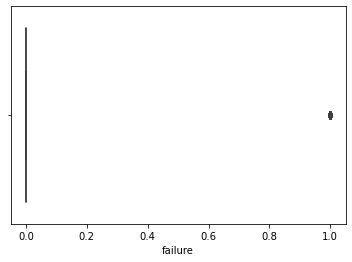

In [14]:
sns.boxplot(data.failure)

In [15]:
hdd.failure.value_counts()

0    15286972
1         400
Name: failure, dtype: int64

In [16]:
data.failure.quantile([0.25,0.5,0.75,0.99,1])

0.25    0.0
0.50    0.0
0.75    0.0
0.99    0.0
1.00    1.0
Name: failure, dtype: float64

Text(0.5, 1.0, 'Disk Models')

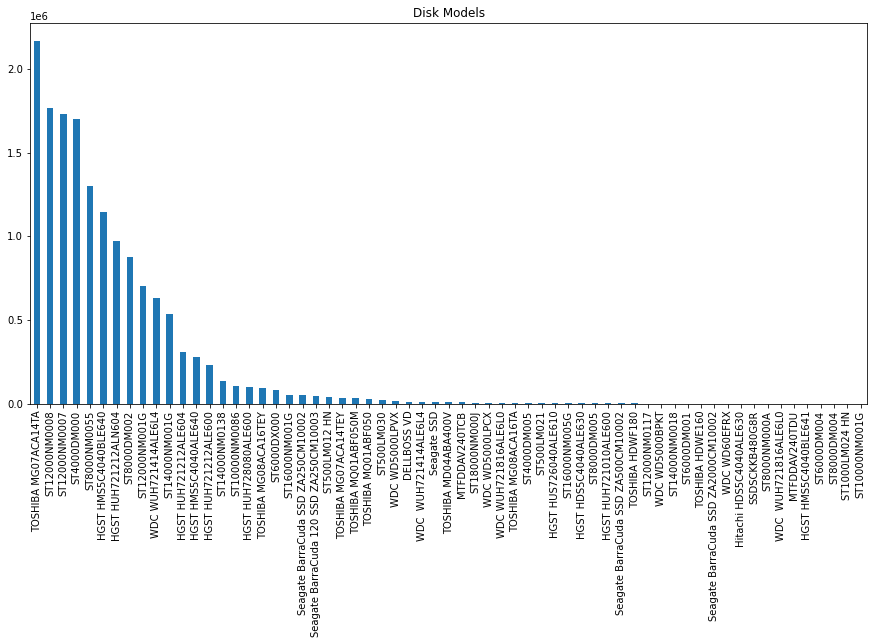

In [17]:
fig = plt.figure(figsize=[15,7])
hdd['model'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Disk Models')


In [18]:
hdd['model'].value_counts(ascending=False)

TOSHIBA MG07ACA14TA                       2165421
ST12000NM0008                             1764318
ST12000NM0007                             1732307
ST4000DM000                               1701967
ST8000NM0055                              1297674
HGST HMS5C4040BLE640                      1146496
HGST HUH721212ALN604                       974310
ST8000DM002                                878106
ST12000NM001G                              704446
WDC WUH721414ALE6L4                        630260
ST14000NM001G                              538401
HGST HUH721212ALE604                       308793
HGST HMS5C4040ALE640                       281692
HGST HUH721212ALE600                       233948
ST14000NM0138                              135157
ST10000NM0086                              108057
HGST HUH728080ALE600                        97027
TOSHIBA MG08ACA16TEY                        91260
ST6000DX000                                 79740
ST16000NM001G                               54177


In [19]:
# Get the count of each value
value_counts = hdd['model'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 100000].index

# Keep rows where the city column is not in to_remove
hdd = hdd[~hdd.model.isin(to_remove)]

([<matplotlib.patches.Wedge at 0x7fed027f16c0>,
 [Text(-0.12823289061008278, 1.0925000346754148, 'TOSHIBA MG07ACA14TA'),
  Text(-0.9025935504511273, 0.6287486641608302, 'ST12000NM0008'),
  Text(-1.088633251126116, -0.1577264864966662, 'ST12000NM0007'),
  Text(-0.6984947895459308, -0.8497676323426223, 'ST4000DM000'),
  Text(-0.04685321961183473, -1.0990017178385143, 'ST8000NM0055'),
  Text(0.5111498668543395, -0.9740255713351632, 'HGST HMS5C4040BLE640'),
  Text(0.8880431089079539, -0.6491374559529716, 'HGST HUH721212ALN604'),
  Text(1.0703641707172609, -0.2536149483858368, 'ST8000DM002'),
  Text(1.0936092817310517, 0.11840075553683593, 'ST12000NM001G'),
  Text(1.0152885285143978, 0.42330745784484936, 'WDC WUH721414ALE6L4'),
  Text(0.8780402952159323, 0.6626048897926416, 'ST14000NM001G'),
  Text(0.7433816534842335, 0.8107920308334606, 'HGST HUH721212ALE604'),
  Text(0.6346581463831128, 0.898448127177942, 'HGST HMS5C4040ALE640'),
  Text(0.53128331967936, 0.963191587499849, 'HGST HUH721212

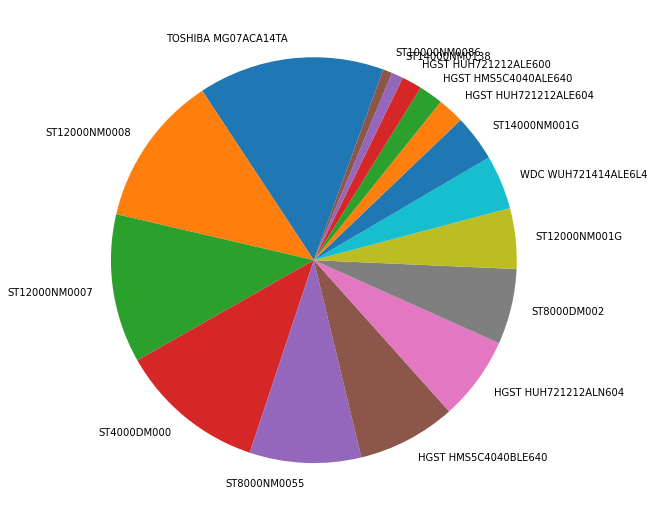

In [20]:
plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.pie(hdd.model.value_counts(), labels = hdd.model.value_counts().index, startangle = 70)


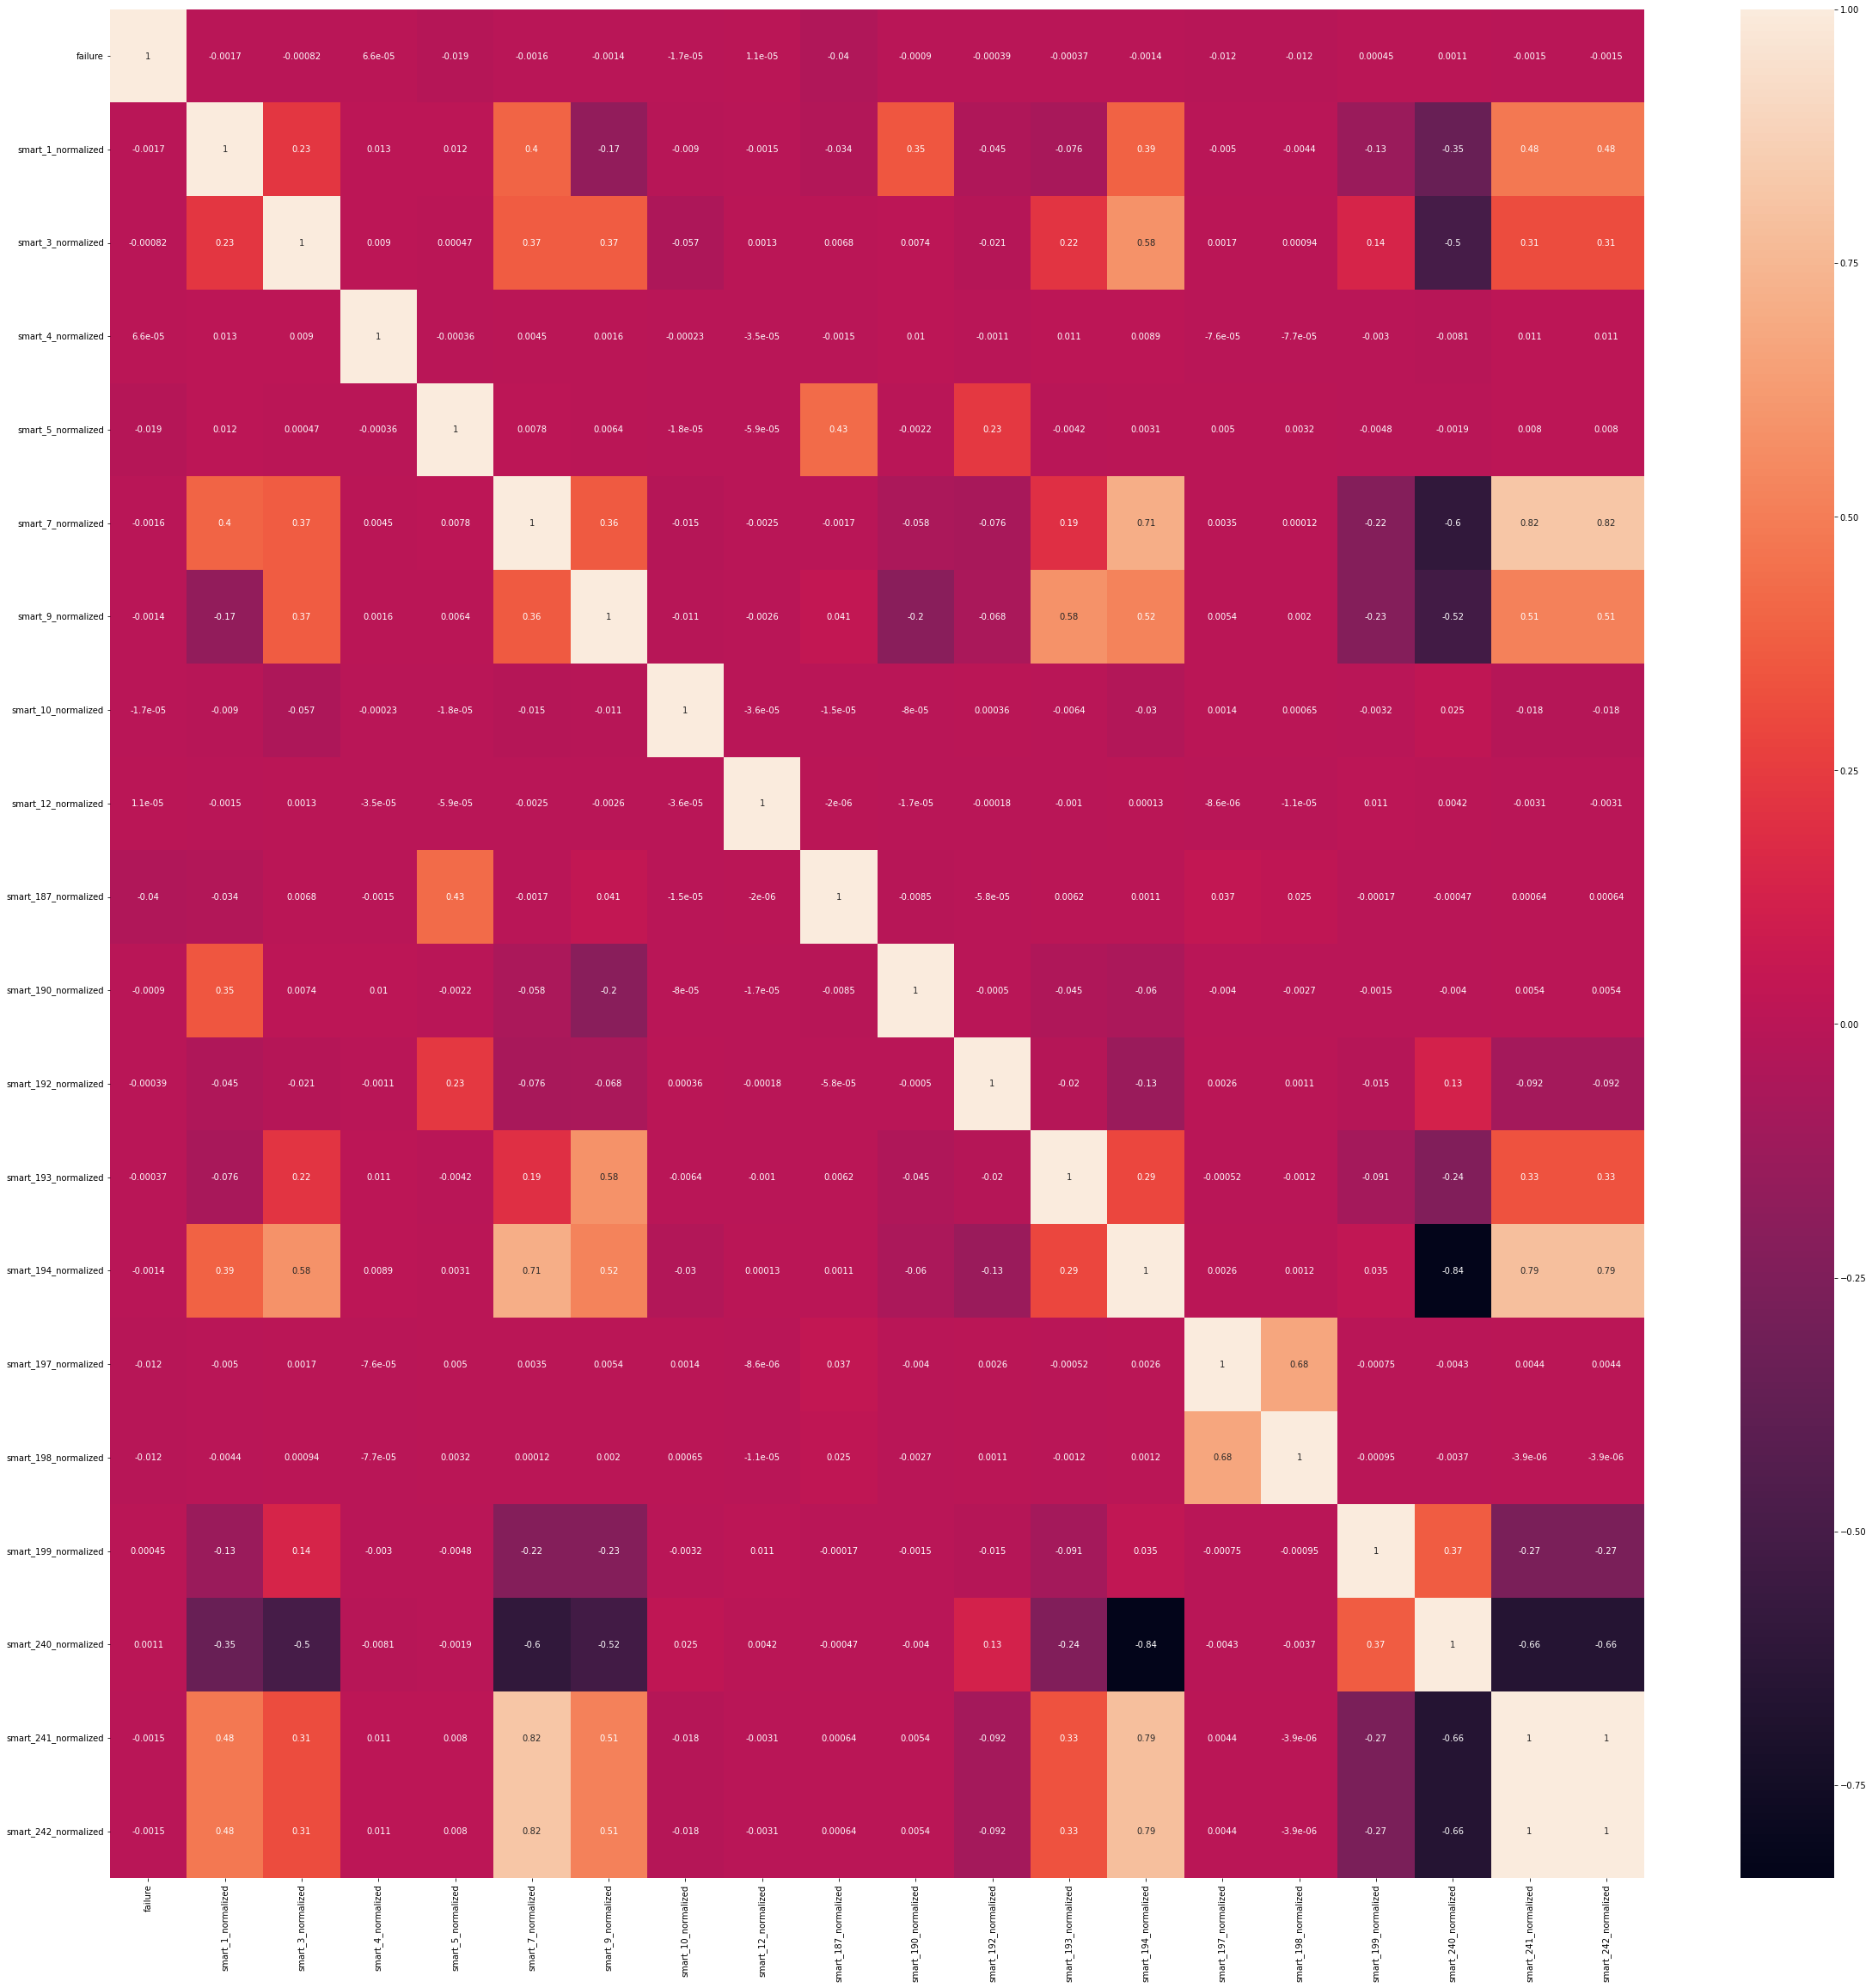

In [21]:
columnsCorr = ['failure',
       'smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized',
       'smart_5_normalized', 'smart_7_normalized', 'smart_9_normalized',
       'smart_10_normalized', 'smart_12_normalized', 'smart_187_normalized', 'smart_190_normalized', 'smart_192_normalized',
       'smart_193_normalized', 'smart_194_normalized', 'smart_197_normalized',
       'smart_198_normalized', 'smart_199_normalized', 'smart_240_normalized',
       'smart_241_normalized', 'smart_242_normalized']
plt.figure(figsize=(40,40))
sns.heatmap(hdd[columnsCorr].corr(),annot=True)
plt.show()

In [22]:
corr0 = hdd[columnsCorr].corr()
corr0_df = corr0.where(np.triu(np.ones(corr0.shape), k = 1).astype(np.bool))
corr0_df = corr0_df.unstack().reset_index()
corr0_df.columns = ['Variable1', 'Variable2', 'Correlation']
corr0_df.dropna(subset=['Correlation'], inplace=True)
corr0_df.Correlation = abs(corr0_df.Correlation)
corr0_df.sort_values('Correlation', ascending=False).head(10)

,Variable1,Variable2,Correlation
398,smart_242_normalized,smart_241_normalized,1.000000
353,smart_240_normalized,smart_194_normalized,0.841735
385,smart_242_normalized,smart_7_normalized,0.818428
365,smart_241_normalized,smart_7_normalized,0.818428
373,smart_241_normalized,smart_194_normalized,0.789254
393,smart_242_normalized,smart_194_normalized,0.789254
265,smart_194_normalized,smart_7_normalized,0.708251
314,smart_198_normalized,smart_197_normalized,0.675833
397,smart_242_normalized,smart_240_normalized,0.655465
377,smart_241_normalized,smart_240_normalized,0.655465


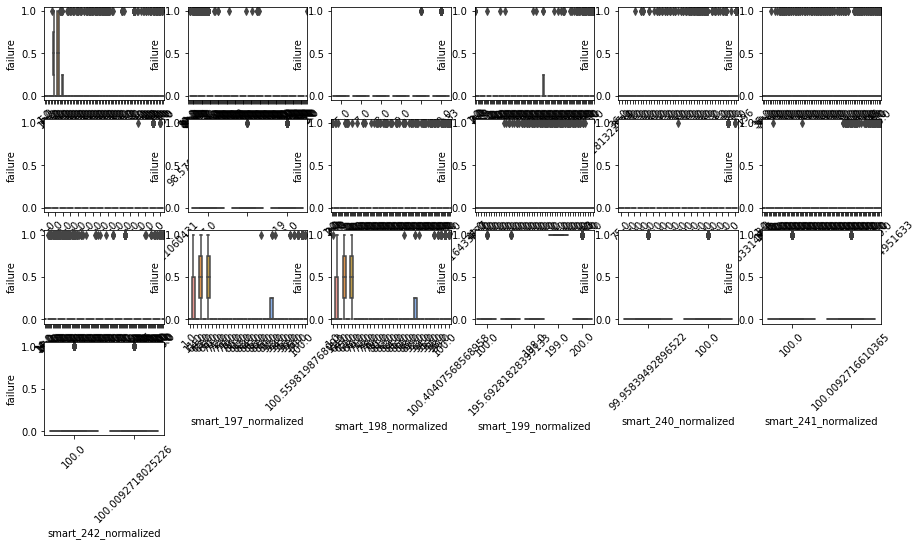

In [23]:
hdd0 = hdd[hdd['failure']==0]
hdd1 = hdd[hdd['failure']==1]

features = ['smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized',
       'smart_5_normalized', 'smart_7_normalized', 'smart_9_normalized',
       'smart_10_normalized', 'smart_12_normalized', 'smart_187_normalized', 
       'smart_190_normalized', 'smart_192_normalized',
       'smart_193_normalized', 'smart_194_normalized', 'smart_197_normalized','smart_198_normalized', 
        'smart_199_normalized', 'smart_240_normalized',
       'smart_241_normalized', 'smart_242_normalized']
plt.figure(figsize = (15,12))
for i in enumerate(features):
    plt.subplot(6,6,i[0]+1)
    sns.boxplot(x = i[1], y = hdd.failure, data = hdd)
    plt.xticks(rotation=45)

In [24]:
hdd.failure.value_counts()

0    14601012
1         341
Name: failure, dtype: int64

In [25]:
hdd.head()

,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_187_normalized,smart_188_normalized,smart_190_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
0,ZLW0EGC6,ST12000NM001G,12000138625024,0,84.0,99.0,100.0,100.0,90.0,93.0,100.0,100.0,100.0,100.0,72.0,100.0,100.0,28.0,100.0,100.0,200.0,100.0,100.0,100.0
1,Z305B2QN,ST4000DM000,4000787030016,0,109.0,91.0,100.0,100.0,88.0,48.0,100.0,100.0,100.0,100.0,79.0,100.0,83.0,21.0,100.0,100.0,200.0,100.0,100.0,100.0
2,ZLW0C6NE,ST12000NM001G,12000138625024,0,80.0,95.0,100.0,100.0,90.0,92.0,100.0,100.0,100.0,100.0,61.0,100.0,100.0,39.0,100.0,100.0,200.0,100.0,100.0,100.0
3,ZJV0XJQ3,ST12000NM0007,12000138625024,0,82.0,98.0,100.0,100.0,88.0,78.0,100.0,100.0,100.0,100.0,72.0,100.0,97.0,28.0,100.0,100.0,200.0,100.0,100.0,100.0
4,ZLW18MKT,ST14000NM001G,14000519643136,0,73.0,94.0,100.0,100.0,86.0,97.0,100.0,100.0,100.0,100.0,73.0,100.0,99.0,27.0,100.0,100.0,200.0,100.0,100.0,100.0


In [26]:
# Solve imbalance - using oversampling/undersampling

from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = hdd[(hdd['failure']==0)] 
df_minority = hdd[(hdd['failure']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5000000, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
hdd = pd.concat([df_minority_upsampled, df_majority])
hdd.failure.value_counts()

0    14601012
1     5000000
Name: failure, dtype: int64

In [27]:

from sklearn.model_selection import train_test_split
X = hdd.drop(['failure'], axis=1)
y = hdd.failure
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=42)


In [28]:
# Using RFE for feature selection

numeric_feature_names =['smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized',
       'smart_5_normalized', 'smart_7_normalized', 'smart_9_normalized',
       'smart_10_normalized', 'smart_12_normalized', 'smart_187_normalized', 
       'smart_190_normalized', 'smart_192_normalized',
       'smart_193_normalized', 'smart_194_normalized', 'smart_197_normalized']
numeric_features = X_train[numeric_feature_names]
numeric_features.head()

,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_187_normalized,smart_190_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized
14422162,83.0,99.0,100.0,100.0,90.0,87.0,100.0,100.0,100.0,61.0,100.0,100.0,39.0,100.0
3595352,83.0,91.0,100.0,100.0,96.0,66.0,100.0,100.0,100.0,67.0,100.0,78.0,33.0,100.0
4905017,81.0,95.0,100.0,100.0,84.0,98.0,100.0,100.0,100.0,67.0,100.0,100.0,33.0,100.0
170090,71.0,86.0,100.0,100.0,93.0,56.0,100.0,100.0,100.0,56.0,100.0,78.0,44.0,100.0
7966534,115.0,93.0,100.0,100.0,90.0,47.0,100.0,100.0,100.0,69.0,100.0,90.0,31.0,100.0


In [29]:
logr = lr()
rfe = RFE(logr)             
rfe = rfe.fit(numeric_features, y_train)

In [30]:
rfe.support_

array([False, False,  True,  True, False, False, False,  True,  True,
        True,  True, False, False,  True])

In [31]:
col = numeric_features.columns[rfe.support_]

In [32]:
numeric_features.columns[~rfe.support_]

Index(['smart_1_normalized', 'smart_3_normalized', 'smart_7_normalized',
       'smart_9_normalized', 'smart_10_normalized', 'smart_193_normalized',
       'smart_194_normalized'],
      dtype='object')

In [33]:
numeric_feature_names =['smart_1_normalized', 'smart_3_normalized', 'smart_7_normalized',
       'smart_9_normalized', 'smart_190_normalized', 'smart_193_normalized',
       'smart_194_normalized']

numeric_features = X_train[numeric_feature_names]
numeric_features.head()

X_Train = tf.convert_to_tensor(numeric_features)
#y_Train = tf.convert_to_tensor(y_train)

numeric_feature_test = X_test[numeric_feature_names]
numeric_feature_test.head()

X_Test = tf.convert_to_tensor(numeric_feature_test)
#y_Test = tf.convert_to_tensor(y_test)

2022-08-27 16:30:45.366362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-27 16:30:45.366471: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-27 16:30:45.366536: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-08-27 16:30:45.368543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
maximum_length = 3
X_train = sequence.pad_sequences(X_Train, maxlen=maximum_length)
X_test = sequence.pad_sequences(X_Test, maxlen=maximum_length)

In [35]:
#Bi-Directional LSTM
embedding_vecor_length = 16
model = Sequential()
model.add(Embedding(500, embedding_vecor_length, input_length=maximum_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 16)             8000      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              93600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 101,801
Trainable params: 101,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
183760/183760 [==============================] - 1098s 6ms/step - loss: 0.4108 - accuracy: 0.8049
Epoch 2/10
183760/183760 [==============================] - 1245s 7ms/step - loss: 0.4054 - accuracy: 0.8074
Epoch 3/10
183760/183760 

In [36]:
# Evaluation of the Bi-directional LSTM Model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Loss: %.2f%%" % (scores[0]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

245013/245013 [==============================] - 579s 2ms/step - loss: 0.4054 - accuracy: 0.8074
Loss: 40.54%
Accuracy: 80.74%


In [37]:
print(scores)

[0.4054097533226013, 0.8074480891227722]
